In [1]:
import pandas as pd
from scipy.stats import spearmanr, pearsonr

In [2]:
df = pd.read_csv('dataset/la_mini_final.csv',sep='|', encoding='utf-8', escapechar='\\')

df.head()

/tmp/ipykernel_163324/1704826722.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/la_mini_final.csv',sep='|', encoding='utf-8', escapechar='\\')


,Unnamed: 0,latitude,longitude,category,avg_rating,num_of_reviews,price,rating,text,FOOD_score,...,ATOMSPHERE_score,ATOMSPHERE_usefulness,SERVICE_score,SERVICE_usefulness,PRICE_score,PRICE_usefulness,MENU_score,MENU_usefulness,SPEED_score,SPEED_usefulness
0,0,34.038545,-118.441846,"['Hawaiian restaurant', 'American restaurant',...",4.4,148,$$,5.0,This place is so incredible. The fish is amazi...,5.000000,...,4.562500,0.964844,5.00000,0.000018,2.828125,1.0,3.390625,1.0,3.031250,1.000000
1,1,34.038545,-118.441846,"['Hawaiian restaurant', 'American restaurant',...",4.4,148,$$,5.0,NUMERO UNO👌🏻\nHighly Recommended.\nHonestly I ...,4.875000,...,4.843750,0.190430,4.06250,0.992188,3.000000,1.0,3.703125,1.0,3.828125,0.984375
2,2,34.038545,-118.441846,"['Hawaiian restaurant', 'American restaurant',...",4.4,148,$$,5.0,Really good fresh poke! :) Just back from Maui...,4.625000,...,4.062500,0.917969,2.59375,1.000000,2.890625,1.0,2.593750,1.0,3.343750,1.000000
3,3,34.038545,-118.441846,"['Hawaiian restaurant', 'American restaurant',...",4.4,148,$$,4.0,Easy place to pick up for postmates delivery. ...,3.015625,...,3.015625,0.660156,3.09375,0.001495,2.296875,1.0,1.898438,1.0,3.500000,0.353516
4,4,34.038545,-118.441846,"['Hawaiian restaurant', 'American restaurant',...",4.4,148,$$,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.dropna(subset=['text'])

In [4]:
# sample 5 reviews and their score
df = df.dropna(subset=['FOOD_score'])
samples = df[['text','FOOD_score', 'FOOD_usefulness', 'rating']].sample(20)

for sample in samples.iterrows():
    print(sample[1]['text'])
    print('Score:', sample[1]['FOOD_score'])
    print('Usefulness:', sample[1]['FOOD_usefulness'])
    print('Rating:', sample[1]['rating'])
    print()

(Translated by Google) Cordial attention, variety of Mexican fast food at a good price.

(Original)
Cordial atención, variedad de comidas rápidas mexicanas a buen precio.
Score: 3.359375
Usefulness: 0.9921875
Rating: 5.0

Always has been one of my favorite spots for comfort food.  Would have preferred to dine in like Pre Covid times but I was impressed by how quickly I was able to get my walk-in order.
Score: 3.453125
Usefulness: 1.0
Rating: 5.0

This place has some pretty good onion rings and burgers, food in general. I'm not sure how expensive everything is because my sugar momma pays for me but the food is really good. The employees are slow to take orders and never once neared us so I could ask for a refill, but the live music was a good distraction. The food is even better when you order over the phone and take it home.
Score: 4.09375
Usefulness: 0.002227783203125
Rating: 3.0

(Translated by Google) Tacos and very delicious burritos

(Original)
Los tacos y los burritos muy delicio

In [5]:
# correlation between score and rating
print('Spearman correlation between score and rating:', spearmanr(df['FOOD_score'], df['rating']))
print('Pearson correlation between score and rating:', pearsonr(df['FOOD_score'], df['rating']))

useful_mask = df['FOOD_usefulness'] > 0.5

df_useful = df[useful_mask]

print('Spearman correlation between score and usefulness:', spearmanr(df_useful['FOOD_score'], df_useful['rating']))
print('Pearson correlation between score and usefulness:', pearsonr(df_useful['FOOD_score'], df_useful['rating']))

Spearman correlation between score and rating: SignificanceResult(statistic=0.5742961078878275, pvalue=0.0)
Pearson correlation between score and rating: PearsonRResult(statistic=0.6624034449169753, pvalue=0.0)
Spearman correlation between score and usefulness: SignificanceResult(statistic=0.5448689490744835, pvalue=0.0)
Pearson correlation between score and usefulness: PearsonRResult(statistic=0.6027281259824585, pvalue=0.0)


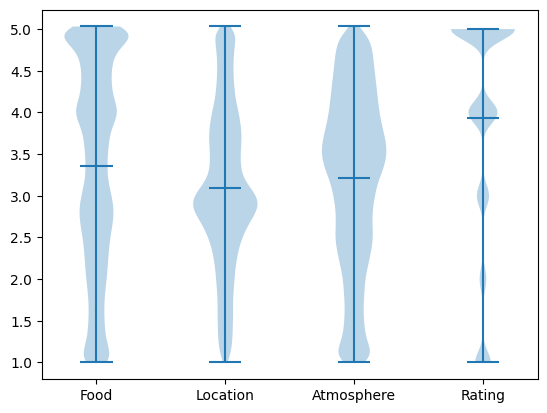

In [6]:
# violin plot
from matplotlib import pyplot as plt

plt.violinplot([df['FOOD_score'], df['LOCATION_score'], df['ATOMSPHERE_score'], df['rating']], showmeans=True)
plt.xticks([1, 2, 3, 4], ['Food', 'Location', 'Atmosphere', 'Rating'])

plt.show()

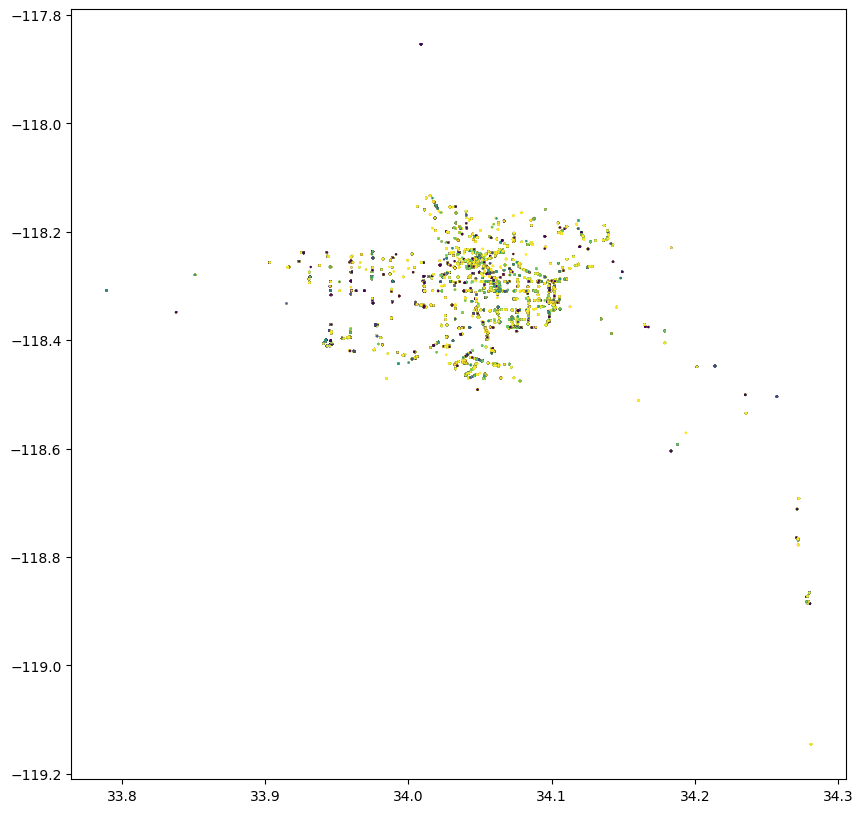

In [7]:
location_df = df[df['latitude'] > 32]

fig = plt.figure(figsize=(10,10))

plt.scatter(location_df['latitude'], location_df['longitude'], c=location_df['rating'], cmap='viridis', s=0.5)
plt.show()

In [8]:
# data to collect
collect_data = [
    'num_of_reviews',
    'price',
    'FOOD_score',
    'FOOD_usefulness',
    'LOCATION_score',
    'LOCATION_usefulness',
    'ATOMSPHERE_score',
    'ATOMSPHERE_usefulness',
    'MENU_score',
    'MENU_usefulness',
    'PRICE_score',
    'PRICE_usefulness',
    'SERVICE_score',
    'SERVICE_usefulness',
    'SPEED_score',
    'SPEED_usefulness',
]

label = 'rating'

def process_price(price):
    if price == '$$$$':
        return 4
    if price == '$$$' or price == '₩₩₩':
        return 3
    if price == '$$' or price == '₩₩':
        return 2
    if price == '$' or price == '₩':
        return 1
    return

X = df[collect_data].copy()
X = X.sample(frac=1)
X['price'] = X['price'].apply(process_price)

y = df[label]

In [9]:
for category in ['FOOD', 'LOCATION', 'ATOMSPHERE', 'MENU', 'PRICE', 'SERVICE', 'SPEED']:
    score = category + '_score'
    usefulness = category + '_usefulness'

    mask = X[usefulness] > 0.5
    X_useful = X[mask]
    avg_value = X_useful[score].mean()
    # make the inverse mask value be replace with the average value
    X.loc[~mask, score] = avg_value
    X.drop(columns=[usefulness], inplace=True)

In [10]:
for feature in X.columns:
    none_na = X[feature].notna()
    average = X[feature][none_na].mean()
    X[feature] = X[feature].fillna(average)
    print('Average', feature, average)

Average num_of_reviews 1650.5772842301544
Average price 1.7356910875785483
Average FOOD_score 2.6859760834201527
Average LOCATION_score 2.907611306642035
Average ATOMSPHERE_score 3.2333348304216187
Average MENU_score 2.6476734343902892
Average PRICE_score 2.494754278123433
Average SERVICE_score 2.6484133799830354
Average SPEED_score 2.8069388196630447


In [11]:
len(X)

120128

In [12]:
# import seaborn as sns

# shuffled_X = X.sample(frac=1)
# sns.pairplot(shuffled_X[:10000])

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)


for feature in X.columns:
    X[feature] = (X[feature] - X[feature].mean()) / X[feature].std()

X_pca = pca.fit_transform(X)

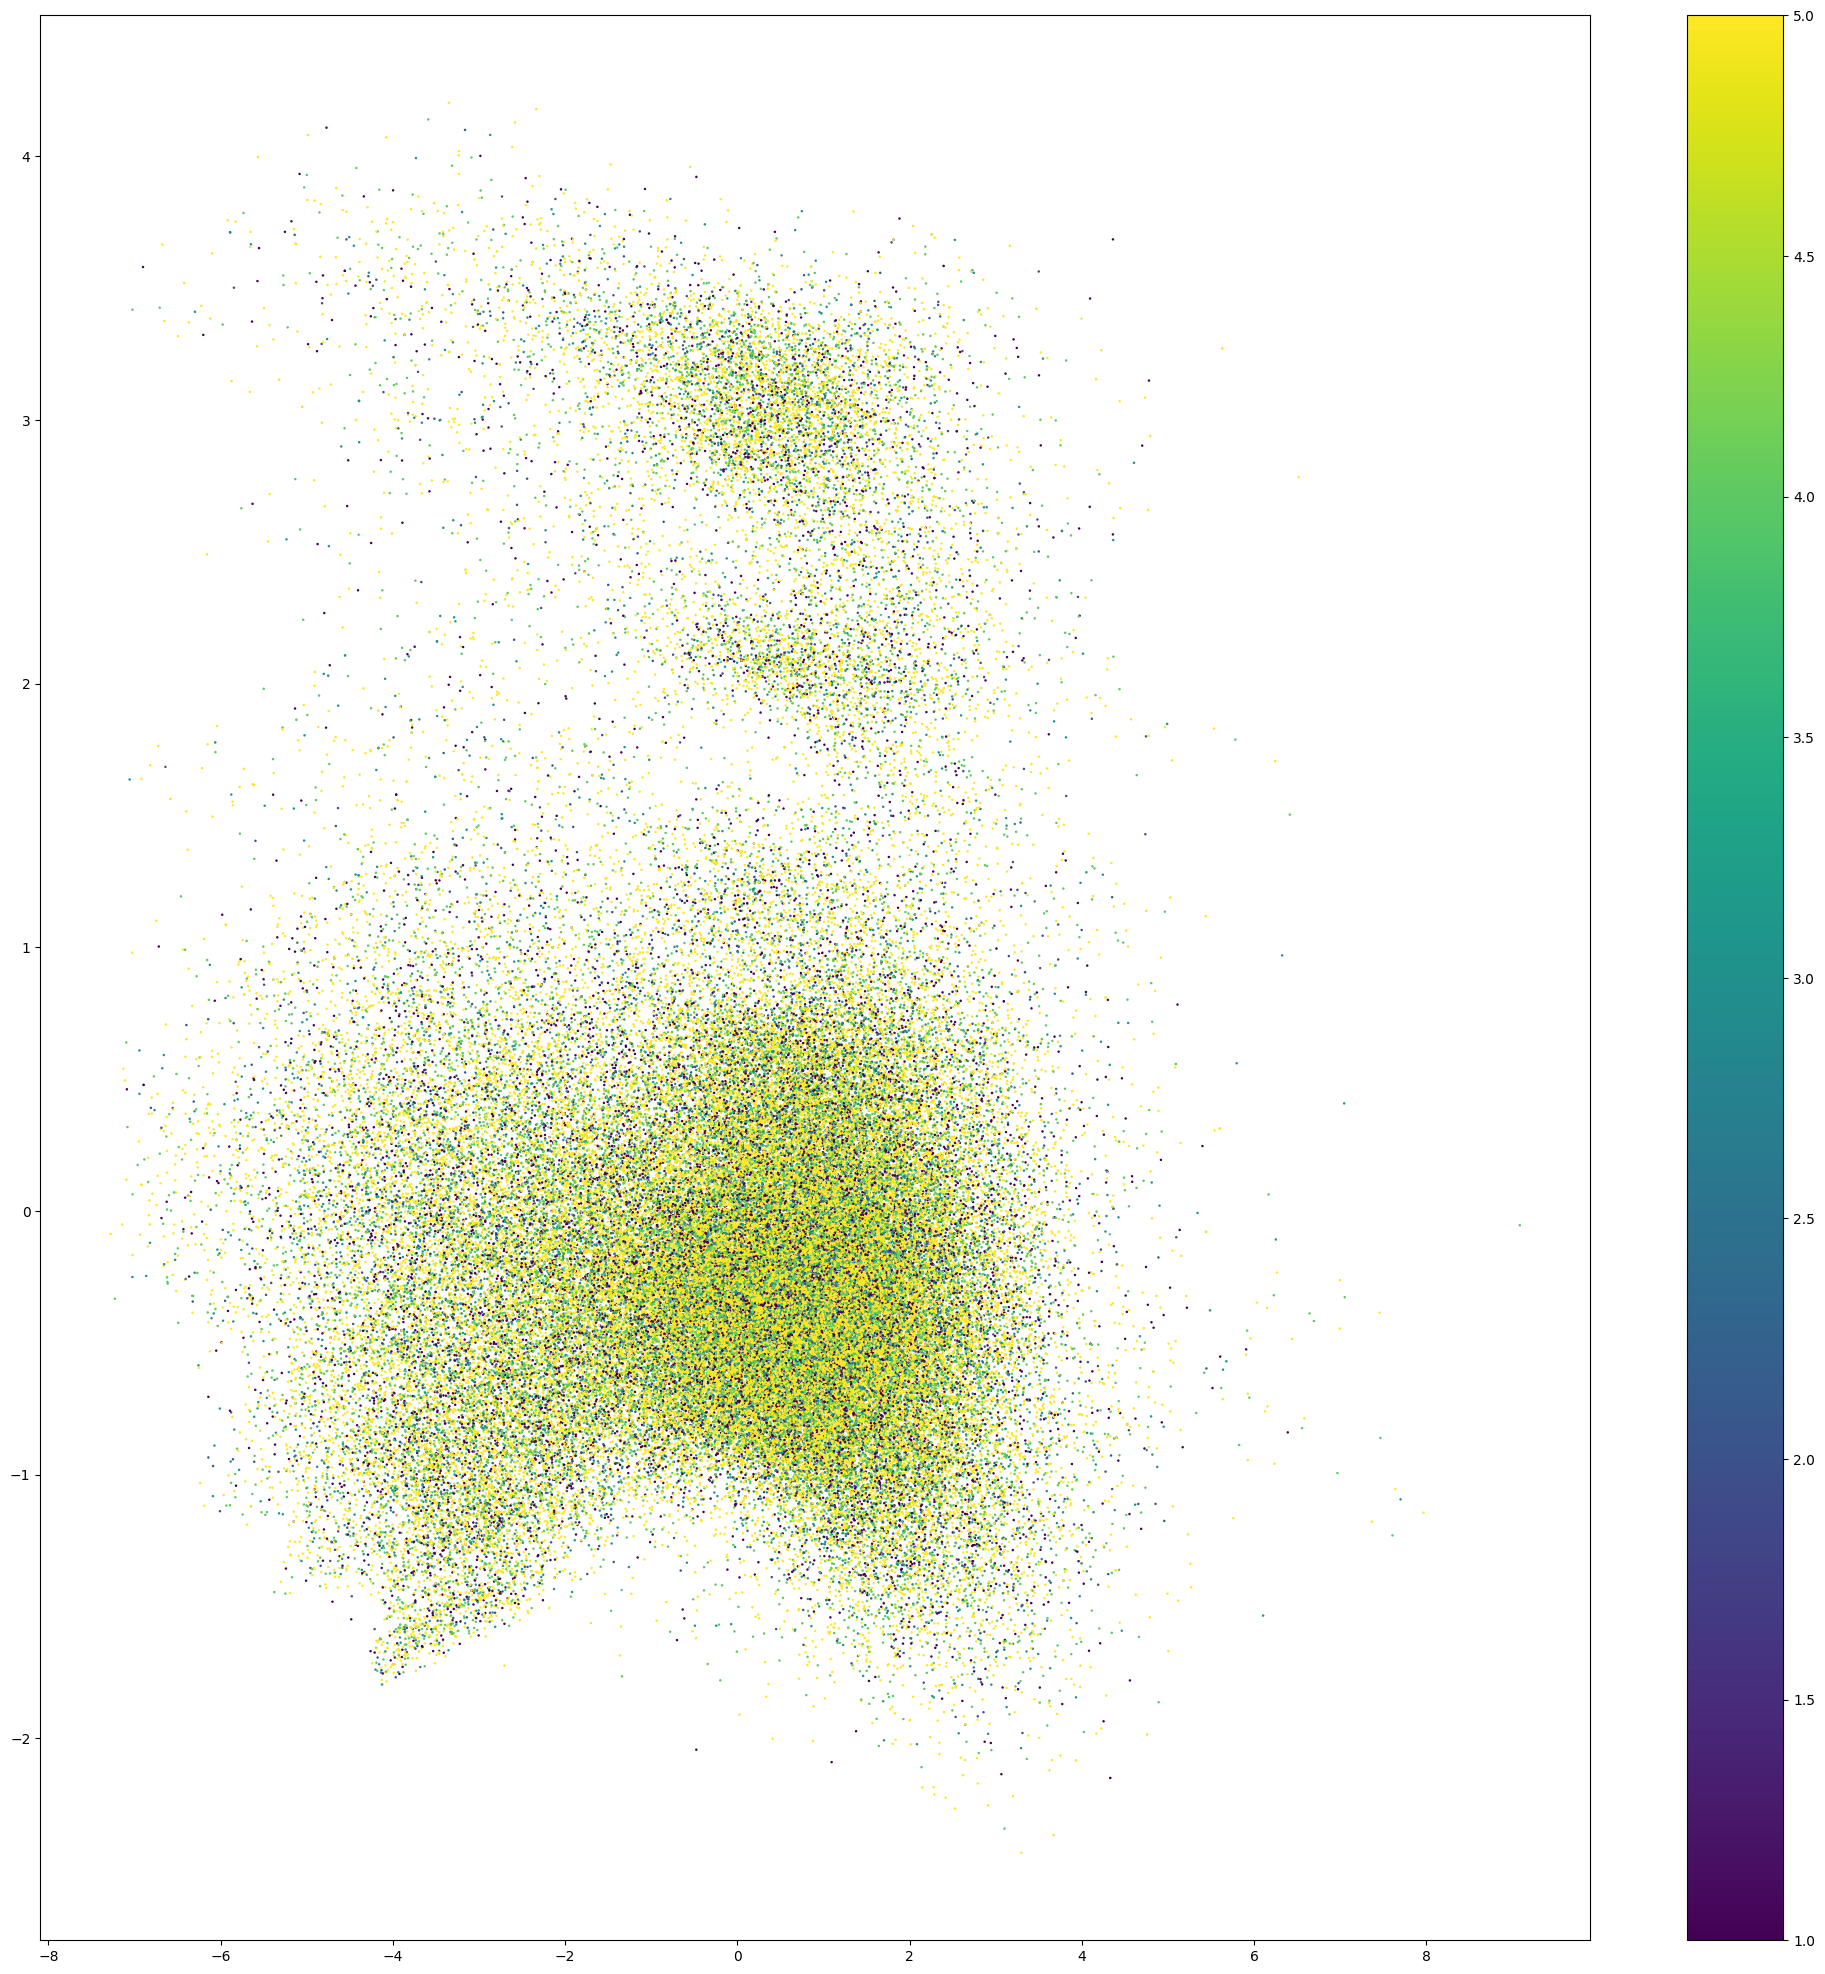

In [14]:
plt.figure(figsize=(25,25))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', s=0.6)
plt.colorbar()

<Axes: >

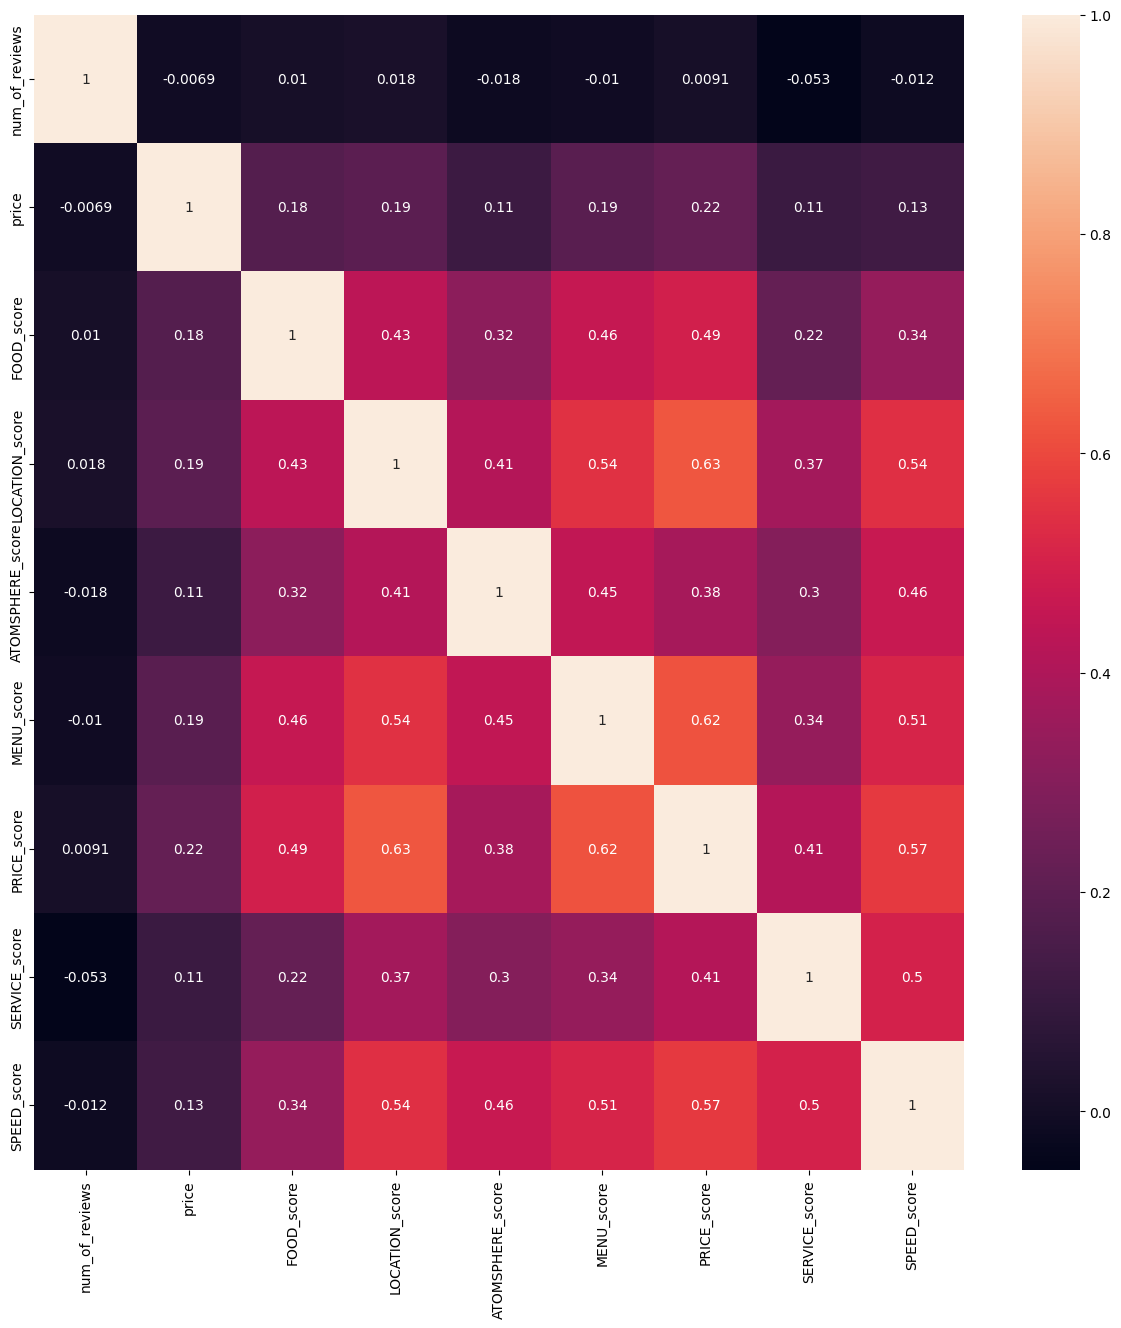

In [15]:
# correlation matrix between features
import seaborn as sns

correlation_matrix = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True)

<Figure size 500x500 with 0 Axes>

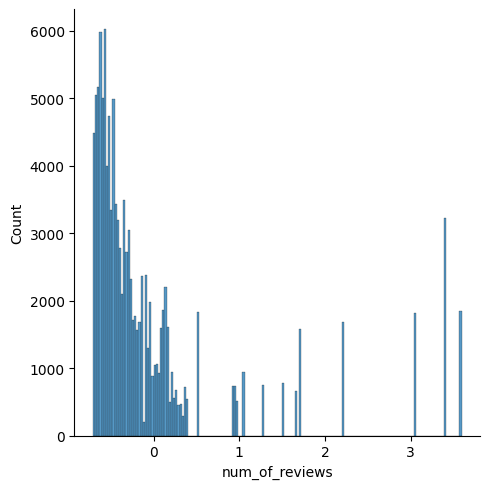

<Figure size 500x500 with 0 Axes>

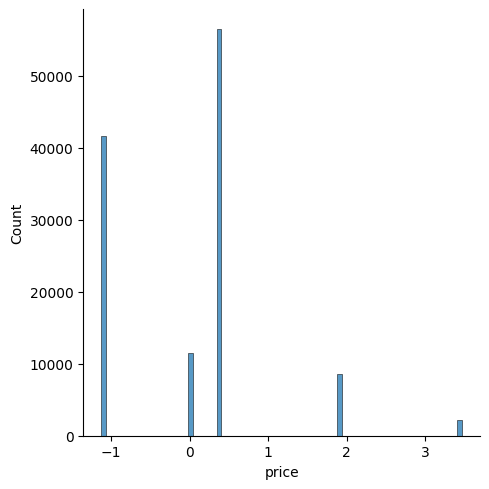

<Figure size 500x500 with 0 Axes>

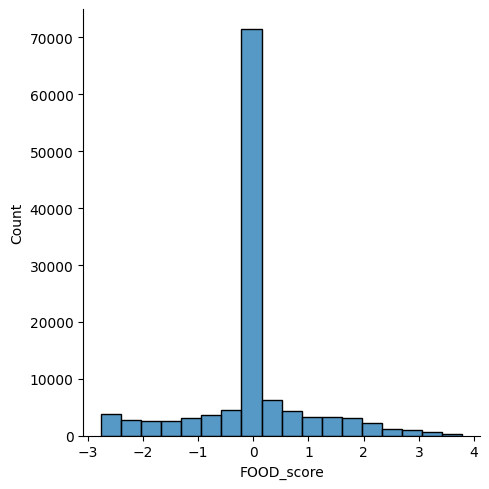

<Figure size 500x500 with 0 Axes>

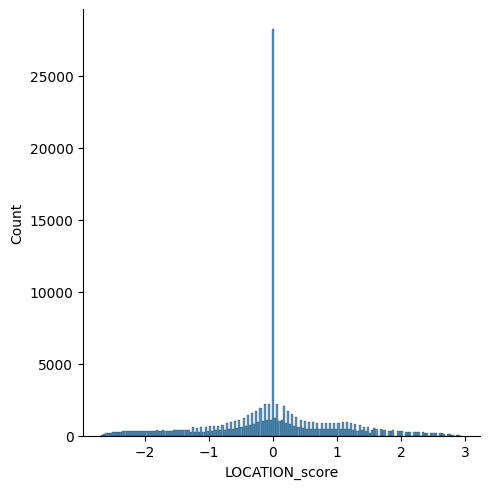

<Figure size 500x500 with 0 Axes>

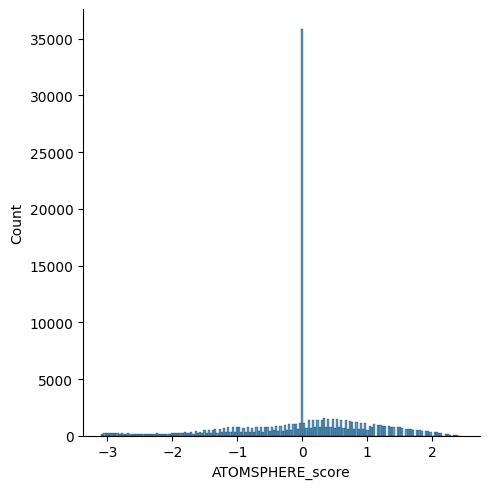

<Figure size 500x500 with 0 Axes>

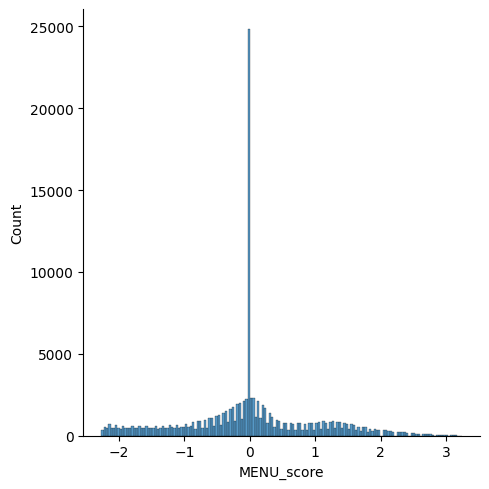

<Figure size 500x500 with 0 Axes>

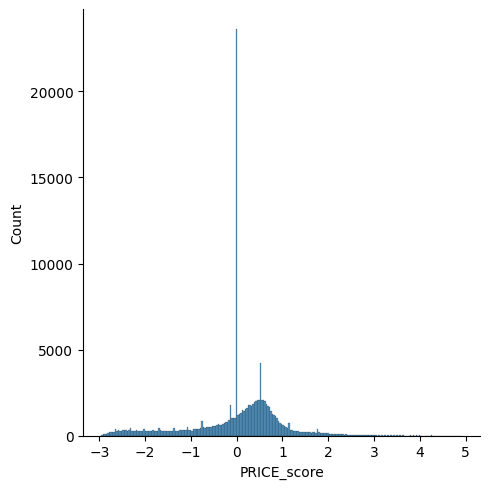

<Figure size 500x500 with 0 Axes>

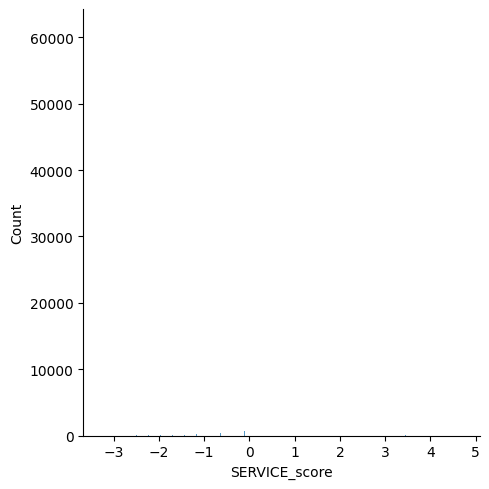

<Figure size 500x500 with 0 Axes>

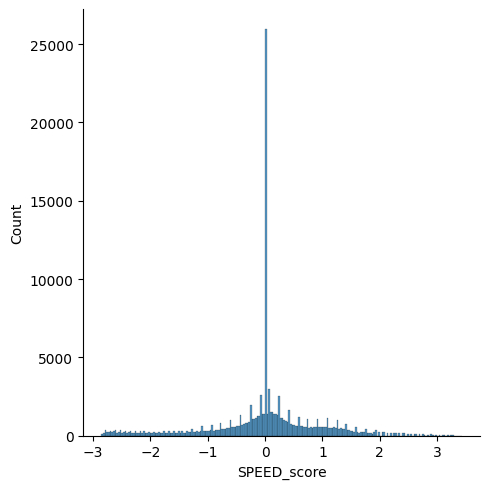

In [16]:
# show distrbuition of each feature

for feature in X.columns:
    plt.figure(figsize=(5,5))
    sns.displot(X[feature])

In [17]:
# train a simple regression model
from sklearn.svm import SVR

model = SVR(verbose=True)
model.fit(X, y)

[LibSVM]..................

In [ ]:
model.score(X, y)

-0.19350121048974556

In [ ]:
predictions = model.predict(X)

for i in range(5):
    indices = y == i
    plt.violinplot([predictions[indices], y[indices]], showmeans=True)